In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile
 

In [5]:
# Load the data into a DataFrame
df = pd.read_excel('ICD.xlsx', sheetname = 'GI')#, sep=',', engine='python' )
#mydata.head()

In [17]:
df['Code']

0        C49.9
1        E88.1
2       L76.34
3          N62
4        N64.2
5        N64.4
6       N64.89
7        Q83.3
8        R22.2
9        Z41.1
10         NaN
11       J32.4
12       J32.8
13      J35.02
14      J35.03
15       A04.7
16       A04.9
17       B18.2
18         B20
19      B37.81
20      B96.81
21       C15.3
22       C15.4
23       C15.5
24       C15.8
25       C15.9
26       C16.0
27       C16.1
28       C16.2
29       C16.3
        ...   
571     Z15.89
572        Z21
573    Z48.815
574      Z80.0
575     Z83.71
576     Z83.79
577     Z85.00
578     Z85.01
579    Z85.020
580    Z85.028
581    Z85.030
582    Z85.038
583    Z85.040
584    Z85.048
585     Z85.05
586    Z85.060
587    Z85.068
588     Z85.07
589     Z85.09
590     Z85.21
591      Z85.3
592     Z85.89
593      Z85.9
594    Z86.010
595    Z86.012
596     Z86.19
597     Z87.11
598     Z87.19
599     z96.89
600     Z98.84
Name: Code, dtype: object

In [361]:
# Create a list from the tweets and assigned labels to train the model

mydata['tweet'] = mydata['tweet'].str.replace('@',' symbolofat ')
mydata['tweet'] = mydata['tweet'].str.replace('#',' symbolofhash ')

mylist = []
for i in range(len(mydata)):
    mylist.append(tuple((mydata.iloc[i,1],mydata.iloc[i,2])))
mylist


[(' symbolofat JetBlue 266 at LGB in Sunny So Cal http://t.co/V015PK7DSi',
  'neutral'),
 (' symbolofat VirginAmerica please add more frequency to PDX Portland',
  'neutral'),
 (' symbolofat united Flight 512 had sime of the rudest flight attendants. I was run over by the drink card and had a flashlight dropped on me.  symbolofhash noapology',
  'negative'),
 (' symbolofat AmericanAir how can I when system always hangs up on me?',
  'negative'),
 (' symbolofat SouthwestAir SWA helps the hotel industry. I always book flights a day before I need to be somewhere as SWA consistent Cancelled Flights/delays.',
  'negative'),
 (' symbolofat USAirways we got 1 drink then F/A sat in jump seat doing crosswords. Glasses picked up at landing. Just a very lazy service 4 First class.',
  'negative'),
 (" symbolofat JetBlue Pooling and gifting are completely different.  I shouldn't have to be charged $375 to send points.  Its disgusting.",
  'negative'),
 (' symbolofat AmericanAir can we get a status

In [ ]:
# Create a list from the tweets and assigned labels to train the model

mylist = []
for i in range(len(mydata)):
    mylist.append(tuple((mydata.iloc[i,1],mydata.iloc[i,2])))
mylist


In [362]:
# Create word of each element and get rid of words that are smaller than 2 characters

new_list = []

for (words, sentiment) in mylist:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    new_list.append((words_filtered, sentiment))

new_list

[(['symbolofat',
   'jetblue',
   '266',
   'lgb',
   'sunny',
   'cal',
   'http://t.co/v015pk7dsi'],
  'neutral'),
 (['symbolofat',
   'virginamerica',
   'please',
   'add',
   'more',
   'frequency',
   'pdx',
   'portland'],
  'neutral'),
 (['symbolofat',
   'united',
   'flight',
   '512',
   'had',
   'sime',
   'the',
   'rudest',
   'flight',
   'attendants.',
   'was',
   'run',
   'over',
   'the',
   'drink',
   'card',
   'and',
   'had',
   'flashlight',
   'dropped',
   'me.',
   'symbolofhash',
   'noapology'],
  'negative'),
 (['symbolofat',
   'americanair',
   'how',
   'can',
   'when',
   'system',
   'always',
   'hangs',
   'me?'],
  'negative'),
 (['symbolofat',
   'southwestair',
   'swa',
   'helps',
   'the',
   'hotel',
   'industry.',
   'always',
   'book',
   'flights',
   'day',
   'before',
   'need',
   'somewhere',
   'swa',
   'consistent',
   'cancelled',
   'flights/delays.'],
  'negative'),
 (['symbolofat',
   'usairways',
   'got',
   'drink',
  

In [363]:
# Define the corpus 

word_features = get_word_features(get_words_in_tweets(new_list))

def get_words_in_tweets(new_list):
    all_words = []
    for (words, sentiment) in new_list:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

word_features

dict_keys(['waiting', 'quick!!', 'clarita', 'us1951+us874.do', 'happen??', 'aa1458', 'august?', 'youcouldntmakethis', "'cuz", 'ua1481', 'cleaned', 'suitcase.', '"inflight', 'top-down', 'inevitable.', 'insure', 'best;', 'chitocle', 'human,', 'paper.', 'clue', 'eternally', 'yup,', 'notanymore', 'angering', 'http://t.co/kqnrrp86a5', 'ios,', 'cheers!', "keepitmovin'", 'enters', 'centers', 'pax', 'waiting.so', 'bonus', 'fueled.', 'garcia', '$174', 'pathetic.', 'sato', 'uncourteous', 'everyone.', 'travel.', 'gunna', 'loc.', 'southbendinwhere', 'http://t.co/mthm9waobu', 'enforcing', '$50?', 'n33103', 'treating', 'oneworld', 'yeah,', 'evaluate', 'thieves.', "they've", 'http://t.co/cyoonzftdc', 'keepingit100', 'stuckinmemphis', 'fispahani', 'luggage.', 'pretty.', 'reebooked', 'fall...florida', 'badly.', 'change,', 'hours..', 'jac', 'char', 'fault?', 'fail...', 'care', 'loosing', 'up,', 'blatantly', 'becuz', 'exist.', 'based', 'jennings.', 'f/a', 'http://t.co/vw4p4t4tlh', 'confirmation.', '(4/19

In [364]:
# Create the dictionary

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


In [365]:
extract_features(['great', 'deal', 'suicide', 'please'])

{'contains(droped)': False,
 "contains(mom's)": False,
 'contains(paper.)': False,
 'contains(goods,)': False,
 'contains(shall)': False,
 'contains(w/them)': False,
 'contains(temp!)': False,
 'contains(bergstrom))': False,
 'contains(starbucks)': False,
 'contains(spiritairlines)': False,
 'contains(gate.)': False,
 'contains(wednesday.)': False,
 'contains(exist.)': False,
 'contains(3670)': False,
 'contains(eat)': False,
 'contains(yes...)': False,
 'contains(tomorrow!)': False,
 'contains(must!)': False,
 'contains(siouxfalls)': False,
 'contains(overweight,)': False,
 'contains(makessense)': False,
 'contains(eager)': False,
 'contains(caexhibitions)': False,
 'contains(merge)': False,
 'contains(sam)': False,
 'contains(happened?)': False,
 'contains(head)': False,
 'contains(hopefully)': False,
 'contains(on.)': False,
 'contains(carousel)': False,
 'contains(barking)': False,
 'contains(americanair.)': False,
 'contains(9news:)': False,
 'contains(fr1/5/2015)': False,
 'conta

In [366]:
# Apply the model

training_set = nltk.classify.apply_features(extract_features, new_list)
training_set


[({'contains(droped)': False, "contains(mom's)": False, 'contains(paper.)': False, 'contains(goods,)': False, 'contains(shall)': False, 'contains(w/them)': False, 'contains(temp!)': False, 'contains(bergstrom))': False, 'contains(starbucks)': False, 'contains(spiritairlines)': False, 'contains(gate.)': False, 'contains(wednesday.)': False, 'contains(exist.)': False, 'contains(3670)': False, 'contains(eat)': False, 'contains(yes...)': False, 'contains(tomorrow!)': False, 'contains(must!)': False, 'contains(siouxfalls)': False, 'contains(overweight,)': False, 'contains(makessense)': False, 'contains(eager)': False, 'contains(caexhibitions)': False, 'contains(merge)': False, 'contains(sam)': False, 'contains(happened?)': False, 'contains(head)': False, 'contains(hopefully)': False, 'contains(on.)': False, 'contains(carousel)': False, 'contains(barking)': False, 'contains(americanair.)': False, 'contains(9news:)': False, 'contains(fr1/5/2015)': False, 'contains(butnot)': False, 'contains(v

In [367]:
# Train the classifier

classifier = nltk.NaiveBayesClassifier.train(training_set)


In [368]:
print (classifier.show_most_informative_features(30))


Most Informative Features
          contains(you!) = True           positi : negati =     54.4 : 1.0
      contains(awesome.) = True           positi : negati =     43.0 : 1.0
           contains(:-)) = True           positi : negati =     40.4 : 1.0
     contains(excellent) = True           positi : negati =     37.8 : 1.0
       contains(excited) = True           positi : negati =     37.8 : 1.0
         contains(great) = True           positi : neutra =     35.8 : 1.0
         contains(hours) = True           negati : neutra =     34.3 : 1.0
         contains(kudos) = True           positi : negati =     32.0 : 1.0
        contains(there!) = True           positi : negati =     29.9 : 1.0
          contains(hold) = True           negati : positi =     27.8 : 1.0
         contains(you!!) = True           positi : negati =     27.3 : 1.0
          contains(thx!) = True           positi : negati =     27.3 : 1.0
          contains(wall) = True           neutra : negati =     26.3 : 1.0

In [386]:
# Testing a tweet

tweet = "Great staff"

print (classifier.classify(extract_features(tweet.split())))


positive


In [387]:
# Classifying a list of tweets 

test_data = pd.read_csv('data/Tweets_test.csv', sep=',', engine='python' )

test_data['tweet'] = test_data['tweet'].str.replace('@',' symbolofat ')
test_data['tweet'] = test_data['tweet'].str.replace('#',' symbolofhash ')


test_data.head()

,tweet_id,tweet,Sentiment
0,5.700000e+17,symbolofat united is my flight delayed? It ke...,negative
1,5.690000e+17,symbolofat JetBlue oh yes! I hope you expand ...,positive
2,5.700000e+17,symbolofat USAirways First the pilot was Late...,negative
3,5.690000e+17,symbolofat SouthwestAir I always brag about u...,negative
4,5.690000e+17,symbolofat SouthwestAir DAL is due for sleet ...,neutral


In [388]:
for i in range(len(test_data)):
#for i in range(10):
    test_data.loc[i,"Predict_Sentiment"] = classifier.classify(extract_features(test_data.iloc[i,1].split()))
test_data.head(20)


,tweet_id,tweet,Sentiment,Predict_Sentiment
0,5.700000e+17,symbolofat united is my flight delayed? It ke...,negative,negative
1,5.690000e+17,symbolofat JetBlue oh yes! I hope you expand ...,positive,negative
2,5.700000e+17,symbolofat USAirways First the pilot was Late...,negative,negative
3,5.690000e+17,symbolofat SouthwestAir I always brag about u...,negative,negative
4,5.690000e+17,symbolofat SouthwestAir DAL is due for sleet ...,neutral,neutral
5,5.690000e+17,symbolofat united please do! She went above a...,positive,positive
6,5.700000e+17,symbolofat SouthwestAir how long does it take...,neutral,negative
7,5.680000e+17,symbolofat USAirways I asked for some reimbur...,negative,negative
8,5.700000e+17,symbolofat JetBlue I knew there was a reason ...,positive,negative
9,5.700000e+17,symbolofat AmericanAir thank you,neutral,positive


In [497]:
# Calculating the accuracy

counter = 0
for i in range(len(test_data)):
    if test_data.loc[i, "Sentiment"] == test_data.loc[i, "Predict_Sentiment"]:
        counter += 1
accuracy = counter/(i+1)
print ("Accuracy of the model: ", accuracy)

Accuracy of the model:  0.832646331409728


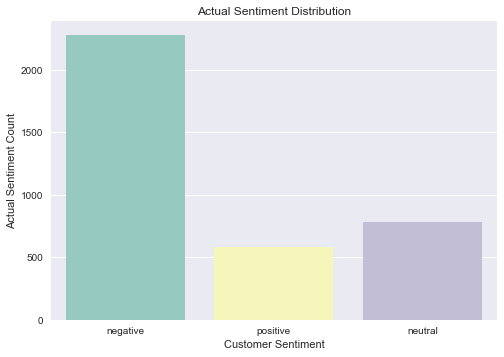

In [508]:

sns.countplot(x="Sentiment", data=test_data , palette="Set3")
plt.title('Actual Sentiment Distribution')
plt.xlabel('Customer Sentiment')
plt.ylabel('Actual Sentiment Count')

plt.show()

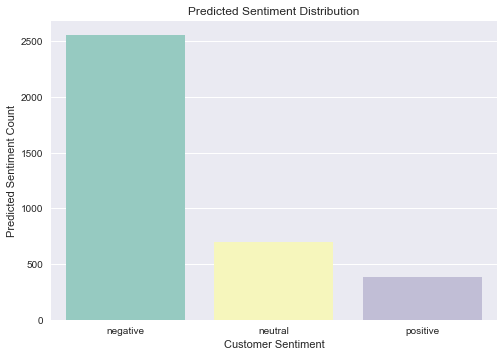

In [506]:
sns.countplot(x="Predict_Sentiment", data=test_data , palette="Set3")
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Customer Sentiment')
plt.ylabel('Predicted Sentiment Count')

plt.show()

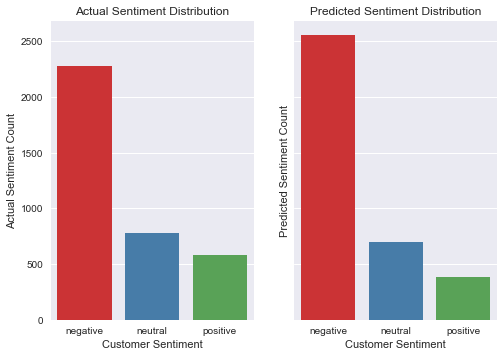

In [541]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f, (ax1, ax2) = plt.subplots(1,2,sharey=True)

sns.countplot(x="Sentiment", data=test_data , palette="Set1", ax=ax1, order = ("negative", "neutral", "positive"))
ax1.set_title('Actual Sentiment Distribution')
ax1.set_xlabel('Customer Sentiment')
ax1.set_ylabel('Actual Sentiment Count')

sns.countplot(x="Predict_Sentiment", data=test_data , palette="Set1", ax=ax2, order = ("negative", "neutral", "positive"))
ax2.set_title('Predicted Sentiment Distribution')
ax2.set_xlabel('Customer Sentiment')
ax2.set_ylabel('Predicted Sentiment Count')

plt.show()